# MSc in AI - CE6002 & CS5062


# E-tivity 5: Higher Dimensions

# CS5062 -Feature Selection - Tasks 1, 2 and 3

## Student Name: Mark Murnane
## Student ID: 18195326
-----

### Import Python modules

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

The following will suppress warnings from sci-kit learn on changes to default values in future releases.

In [2]:
# Don't want FutureWarnings from scikit-learn
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

### Load and prepare the dataset for training and evaluation
Feel free to apply any other pre-processing technique at this point.

In [3]:
wine_df = pd.read_csv("./winequality_red.csv")
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Get a quick view of the data
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# target attribute
target_attribute_name = 'quality'
target = wine_df[target_attribute_name]

# predictor attributes
predictors = wine_df.drop(target_attribute_name, axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

### Target Variable Distribution

The initial testing in Task 1 below demonstrates that the models generated have difficulty correctly predicting the target class (with scores of < 60%).

In [6]:
target.hist()

As the vast majority of the target values (> 75%) are grouped around the values 5 and 6, it is difficult for the model to discriminate between some of the target values.  

Depending on later tasks, it may be useful to reclassify the quality as either "Poor", "Normal", "Improved". This would improve the accuracy of the models by creating larger target "groups" on which to train.  Nik has pointed out that accuracy is not the goal, however.

# Task 1

Split the data set into a training (80%) and test (20%) data sets.

In [7]:
# pepare independent stratified data sets for training and test of the final model
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, shuffle=True, stratify=target, random_state=42)

## A. Feature Selection

#### 1. Apply RFE with SVM for selecting the best features

In [8]:
# create a base classifier used to evaluate a subset of attributes
estimatorSVM = svm.SVR(kernel="linear")
selectorSVM = RFE(estimatorSVM, 3)
selectorSVM = selectorSVM.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorSVM.support_)
print(selectorSVM.ranking_)

[False  True False False False False False False False  True  True]
[4 1 9 5 3 8 2 6 7 1 1]


The output above shows that RFE with SVM has selected the features _volatile acidity_, _sulphates_ and _alcohol_ as the 3 best features for predicting the target classes.

#### 2. Apply RFE with Logistic Regression for selecting the best features

In [9]:
# create a base classifier used to evaluate a subset of attributes
estimatorLR = LogisticRegression()
# create the RFE model and select 3 attributes
selectorLR = RFE(estimatorLR, 3)
selectorLR = selectorLR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorLR.support_)
print(selectorLR.ranking_)

[False  True False False False False  True False False False  True]
[5 1 4 9 7 6 1 3 8 2 1]


The output above shows that RFE with Logistic Regression has selected the features _volatile acidity_, _total sulfur dioxide_ and _alcohol_ as the 3 best features for predicting the target classes.

The change from SVM is the swap of _sulphates_ for _total sulfur dioxide_

## B. Evaluate on the Test Data Set

Apply the selectors to prepare training data sets only with the selected features

__Note:__ The same selectors are applied to the test data set. However, it is important that the test data set was not used by (it's invisible to) the selectors. 

In [10]:
predictors_train_SVMselected = selectorSVM.transform(predictors_train)
predictors_test_SVMselected = selectorSVM.transform(predictors_test)

In [11]:
predictors_train_LRselected = selectorLR.transform(predictors_train)
predictors_test_LRselected = selectorLR.transform(predictors_test)

### Train and evaluate SVM classifiers with both the selected features and all features 

Here we train three models:
* model1 - with the features selected by SVM
* model2 - with the features selected by Logistic Regression
* model3 - with all features (i.e. without feature selection)

In [12]:
classifier = svm.SVC()

In [13]:
model1 = classifier.fit(predictors_train_SVMselected, target_train)
model1.score(predictors_test_SVMselected, target_test)

0.559375

In [14]:
model2 = classifier.fit(predictors_train_LRselected, target_train)
model2.score(predictors_test_LRselected, target_test)

0.55625

In [15]:
model3 = classifier.fit(predictors_train, target_train)
model3.score(predictors_test, target_test)

0.559375

## C. Conclusion

In this initial run the classifier results show that the classifier with all values is actually the best.  The margin to the Logistic Regression feature selection is small, however, so this may not be indicative.

The difference to the model train with SVM's chosen features is greater.  As they both chose _volatile acidity_ and _alchohol_ as key features, this suggests that _total sulfur dioxide_ is a better predictive feature than _sulphates_.

Additionally the similarity of the accuracies across all three models suggests that _volatile acidity_ and _alcohol_ are dominant features in predicting the target _quality_.  The remaining features may add some additional accuracy, but do not make a significant addition to a model's accuracy.

------------

# Task 2


Repeat the experiment from Task 1 in a loop with different training/test stratified splits.

For this task the use of Scikit's `StratifiedKFold` seems to tbe the most appropriate way to split the data.

A hold out set can also be used for testing the optimal model suggested by the K-Fold testing.  As we've already split the data above we can hold on to that split data in the form of `target_train` and `target_test`.

## Loop evaluation for feature selection


#### TODO
Fix target_train type of Series

In [29]:
# Split the data into 10 folds for training.  Have the data shuffled before the split
# Shuffling will also be done by train_test_split so may not be required, but extra shuffle won't hurt

SPLITS = 5

strat_fold = StratifiedKFold(n_splits=SPLITS, shuffle=True, random_state=42)

accuracies_SVM = np.zeros(SPLITS)
accuracies_LR = np.zeros(SPLITS)
accuracies_ALL = np.zeros(SPLITS)

# Keep track of fold we're in, just in case
for fold, (train_idx, validation_idx) in enumerate(strat_fold.split(predictors_train, target_train.values)):
    print(f"[START]\tBegin processing fold {fold} ... ")
   
    # First of all, split this folds data into training and test sets
    fold_X_train, fold_X_val = predictors_train[train_idx], predictors_train[validation_idx]
    fold_y_train, fold_y_val = target_train.values[train_idx], target_train.values[validation_idx] 

    # Now that the data is split we can run feature selection as the validation set remains independent of the feature selection
    # The validation set is also transformed based on the training set, but has not influenced that transform
    # As we're repeating the Task 1 experiement, we can re-use the selector objects from above
    selectorSVM = selectorSVM.fit(fold_X_train, fold_y_train)  
    fold_train_SVM_predictors = selectorSVM.transform(fold_X_train)
    fold_val_SVM_predictors = selectorSVM.transform(fold_X_val)
    
    # Repeat for Logistic Regression
    selectorLR = selectorLR.fit(fold_X_train, fold_y_train)
    fold_train_LR_predictors = selectorLR.transform(fold_X_train)
    fold_val_LR_predictors = selectorLR.transform(fold_X_val)
    
          
    # Evaluate the models for this split and store the results
    fold_SVM = classifier.fit(fold_train_SVM_predictors, fold_y_train)
    accuracies_SVM[fold] = fold_SVM.score(fold_val_SVM_predictors, fold_y_val)
    
    fold_LR = classifier.fit(fold_train_LR_predictors, fold_y_train)
    accuracies_LR[fold] = fold_LR.score(fold_val_LR_predictors, fold_y_val)
    
    fold_ALL = classifier.fit(fold_X_train, fold_y_train)
    accuracies_ALL[fold] = fold_ALL.score(fold_X_val, fold_y_val)
    
    print(f"[END]\tFinished processing fold {fold}\n")
    
print("Completed StratifiedKFold processing")

[START]	Begin processing fold 0 ... 
[END]	Finished processing fold 0

[START]	Begin processing fold 1 ... 
[END]	Finished processing fold 1

[START]	Begin processing fold 2 ... 
[END]	Finished processing fold 2

[START]	Begin processing fold 3 ... 
[END]	Finished processing fold 3

[START]	Begin processing fold 4 ... 
[END]	Finished processing fold 4

Completed StratifiedKFold processing


In [32]:
print(f"Accuracy values for SVM feature selection: {accuracies_SVM}\n")
print(f"Accuracy values for LR feature selection: {accuracies_LR}\n")
print(f"Accuracy values for no feature selection: {accuracies_ALL}\n")

Accuracy values for SVM feature selection: [0.53696498 0.57976654 0.54296875 0.57254902 0.56692913]

Accuracy values for LR feature selection: [0.53696498 0.58754864 0.55859375 0.60392157 0.59448819]

Accuracy values for no feature selection: [0.52918288 0.58365759 0.55859375 0.58039216 0.57086614]



## Box Plot

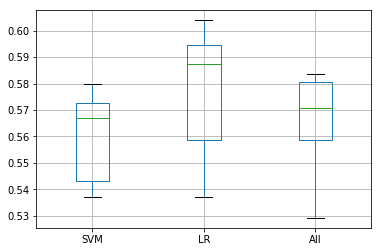

In [34]:
accuracies_df = pd.DataFrame({'SVM':accuracies_SVM, 'LR':accuracies_LR, 'All':accuracies_ALL})
accuracies_df.boxplot()

### Conclusion

The box plot shows that the Logistic Regression selected features outperformed the SVM-selected features as well as the models with no features selected.  It had not only the highest results, but the range of results was higher than the other models. 

The results stands in contrast to Task 1 where the _All features_ model was slightly better.  This experiment appears to confirm the suspicion that the results for _All_ in Task 1 was "lucky" rather than something specific in the feature set.  The improved results for LR in Task 2 confirm that the extra features in _All_ add no benefit in training the model.